## TESTING

In [16]:
import numpy as np
import tensorflow as tf
import cv2
import os
import imghdr
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [80]:
# model = load_model('models/flowers_second_model.h5')
model = load_model('models/flowers_20_small_data.h5')

In [81]:
# large dataset(1000 photots per class) - 5 species
# flower_categories = ['daisy', 'dandelion' , 'rose', 'sunflower' , 'tulip']

# Small dataset(200 photos per flower class) - 15 species
# flower_categories = ['bluszcz', 'dracena' , 'fiolek', 'krokus' , 'mak', 'mniszek lekarski', 'niezapominajka', 'paproc', 'przebisnieg', 'roza', 'slonecznik', 'stokrotka', 'storczyk', 'tulipan', 'wisnia']

# Small dataset(200 photos per flower class) - 30 species
# flower_categories = ['aster', 'barszcz sosnowskiego', 'barwinek', 'bluszcz', 'chaber', 'dalia', 'dracena', 'fiolek', 'gwiazda_betlejemska', 'jezowka', 'koniczyna', 'krokus', 'liliowiec', 'lulek', 'mak', 'mieczyk', 'mlecz', 'nagietek', 'niezapominajka', 'paproc', 'przebisnieg', 'rosiczka', 'roza', 'rozchodnik okazaly', 'slonecznik', 'stokrotka', 'storczyk', 'szafirek', 'szalwia', 'tulipan', 'wisnie']

# Small dataset(200 photos per flower class) - 20 species
flower_categories = ['chaber', 'dalia', 'fiolek', 'jezowka', 'koniczyna', 'krokusy', 'liliowiec', 'mak', 'mieczyk', 'mniszek lekarski', 'nagietek', 'niezapominajka', 'paproc', 'przebisnieg', 'roza', 'slonecznik', 'stokrotka', 'storczyk', 'szafirek', 'tulipan']

In [100]:
# flowers_pred_dir = 'flowers_test_prediction'
# flowers_pred_dir = 'test_photos/test_prediction_small_dataset_30'
flowers_pred_dir = 'data/data_small/split_data_20species/test/storczyk'

1/1 [==============================] - 0s 76ms/step

Image path: data/data_small/split_data_20species/test/storczyk\606c853f23331.jpg
Result: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Prediction: storczyk


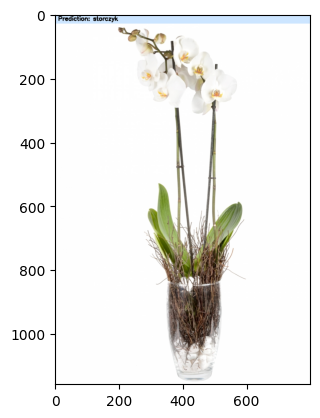



1/1 [==============================] - 0s 42ms/step

Image path: data/data_small/split_data_20species/test/storczyk\ea6-a16d-c25094b27397_max_900_1200_oslonka-na-storczyk-salon-styl-nowoczesny.jpg
Result: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Prediction: tulipan


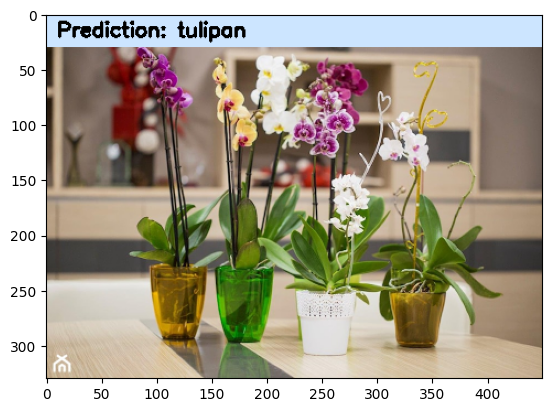



1/1 [==============================] - 0s 46ms/step

Image path: data/data_small/split_data_20species/test/storczyk\i-storczyk-sztuczny-kwiat-bialy-orchidea-storczyki.jpg
Result: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Prediction: storczyk


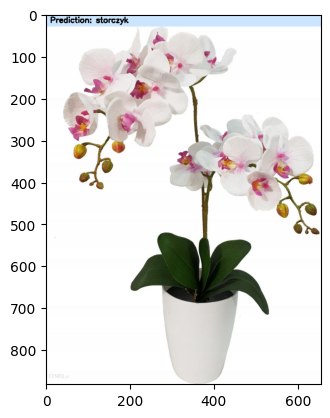



1/1 [==============================] - 0s 44ms/step

Image path: data/data_small/split_data_20species/test/storczyk\image16.jpeg
Result: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Prediction: mak


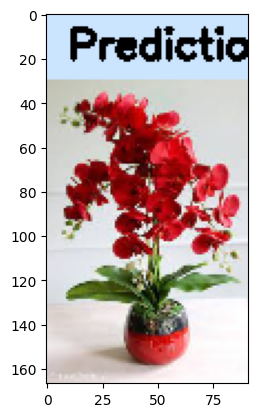



1/1 [==============================] - 0s 57ms/step

Image path: data/data_small/split_data_20species/test/storczyk\images117.jpg
Result: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Prediction: tulipan


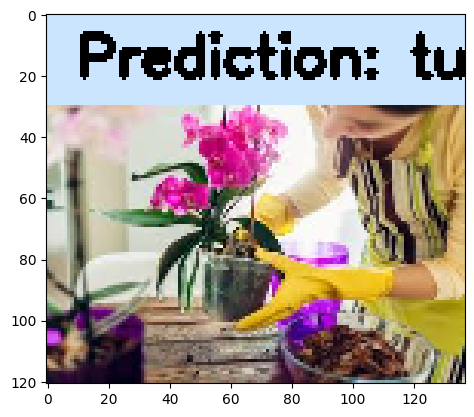



1/1 [==============================] - 0s 53ms/step

Image path: data/data_small/split_data_20species/test/storczyk\images207.jpg
Result: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Prediction: jezowka


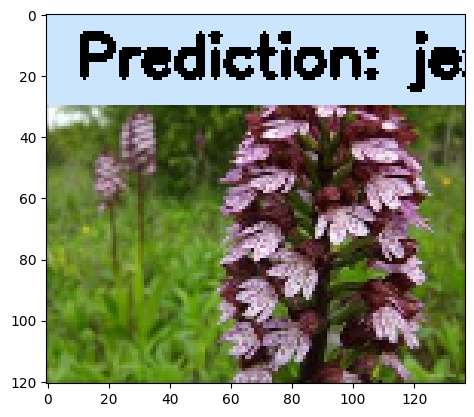



1/1 [==============================] - 0s 74ms/step

Image path: data/data_small/split_data_20species/test/storczyk\images222.jpg
Result: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Prediction: nagietek


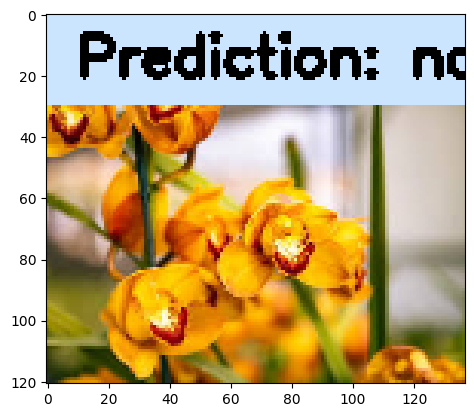



1/1 [==============================] - 0s 43ms/step

Image path: data/data_small/split_data_20species/test/storczyk\images25.jpg
Result: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Prediction: storczyk


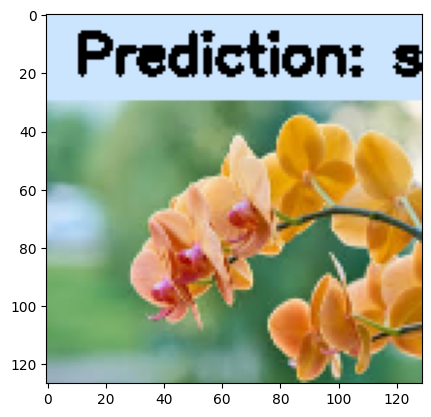



1/1 [==============================] - 0s 42ms/step

Image path: data/data_small/split_data_20species/test/storczyk\storczyk3.jpg
Result: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Prediction: stokrotka


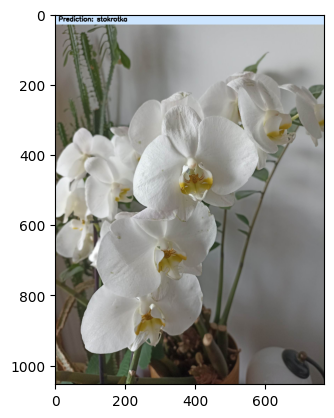

In [101]:
for img in os.listdir(flowers_pred_dir):
    image_path = os.path.join(flowers_pred_dir, img)
    test_image = image.load_img(image_path, target_size=(224,224))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    
    result = model.predict(test_image)
    flower_pred = flower_categories[np.argmax(result[0])]
    
    img_final = cv2.imread(image_path)
    
    # resize image  
    scale_percent = 50 # percent of original size
    width = int(img_final.shape[1] * scale_percent / 100)
    height = int(img_final.shape[0] * scale_percent / 100)
    dim = (width, height)
    img_final = cv2.resize(img_final, dim)
    
    header = np.zeros((30, img_final.shape[1], 3), np.uint8)
    header[:] = (255, 229, 204)
    vcat = cv2.vconcat((header, img_final))
    plt.imshow(vcat)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(vcat,f'Prediction: {flower_pred}', (10,20), font, 0.6, (0,0,0), 2, 0)
    plt.imshow(cv2.cvtColor(vcat, cv2.COLOR_BGR2RGB))
    print(f'\nImage path: {image_path}')
    print(f'Result: {result[0]} Prediction: {flower_pred}')
    plt.show()
    print('\n')

In [84]:
flowers_test_dir = 'data/data_small/split_data_20species/test'

In [85]:
for image_class in os.listdir(flowers_test_dir):
    wrong_pred = .0
    right_pred = .0
    for img in os.listdir(os.path.join(flowers_test_dir, image_class)):
        image_path = os.path.join(flowers_test_dir, image_class, img)

        test_image = image.load_img(image_path, target_size=(224,224))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)
    
        result = model.predict(test_image)
        flower_pred = flower_categories[np.argmax(result[0])]
        
        if flower_pred == image_class:
            right_pred += 1
        else:
            wrong_pred += 1
    right_percent = (right_pred / (wrong_pred + right_pred)) * 100
    print(f'{image_class}: {right_percent}')

1/1 [==============================] - 0s 54ms/step
chaber: 14.285714285714285
1/1 [==============================] - 0s 38ms/step
dalia: 20.0
1/1 [==============================] - 0s 37ms/step
fiolek: 60.0
1/1 [==============================] - 0s 48ms/step
jezowka: 25.0
1/1 [==============================] - 0s 61ms/step
koniczyna: 25.0
1/1 [==============================] - 0s 65ms/step
krokusy: 27.27272727272727
1/1 [==============================] - 0s 44ms/step
liliowiec: 37.5
1/1 [==============================] - 0s 52ms/step
mak: 100.0
1/1 [==============================] - 0s 54ms/step
mieczyk: 30.0
1/1 [==============================] - 0s 62ms/step
mniszek lekarski: 18.181818181818183
1/1 [==============================] - 0s 41ms/step
nagietek: 20.0
1/1 [==============================] - 0s 44ms/step
niezapominajka: 90.0
1/1 [==============================] - 0s 53ms/step
paproc: 30.0
1/1 [==============================] - 0s 48ms/step
przebisnieg: 20.0
1/1 [=============